# Project Name: AMES House Feature Selection - Increasing Home Value

## Problem Statement

Given the dataset from Kaggle's challenge: [Ames Housing Dataset](#https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/overview), we were tasked with testing and identifying house-features best suited for estimating a house price. Our overall recommendations will err more on advisement side of prioritizing house features as opposed to expecting house price.
<br> <br><t>HoA is suffering because home-owner negligence is driving property value down. Complaints received identified that the HoA's home-value assessments are unfounded thus home-owners are no longer following HoA policies.
<br><br>
The problem we identify here: what can we do to improve our neighborhood's home values during a time of low HoA approval and regulation following. 
<br>
We will look at individual feature sets and use regression model scoring to identify influentifial home features. Then we'll compare this with external research to identify best recommendations with influence to improving home price.

## Executive Summary:

Our models showed our single numerical categories to give us the best consistent regression scoring (R2, MRSE, CrossVal). These consisted mostly of room related scorings and quantities. While our Numerical Category Regression model averaged a score of approximately 74% variability explained, it swung a large Root Mean Squared Error of close to 40,000. <br> <br> 
Understanding this we can use the numerical R scoring and investigate its correlation to sale price, then find home projects that fall within the individual average home owner's finance. <br> <br> External research confirms we have several means to take wihtin our own personal homes for value improvement as well as legal means to pursue enforcement of architechtural upgrades.

### Contents:

- [Library-Imports](#Library-Imports)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
 - [Cleaning and Feature Selection](#Cleaning-and-Feature-Selection)
  - [Categorical](#Categorical-House-Features)
  - [Numerical](#Numerical-Features)
  - [Scaled](#Scaled-Features)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - [Categorical Features](#Categorical)
   - [Score](#Categorical-Score-Summary)
 - [Numerical Features](#Numerical)
   - [Score](#Numercal-Score-Summary)
 - [Scaled Features](#Scaled-Numerics)
   - [Score](#Scaled-Score-Summary)
- [Data Visualization](#Data-Visualization)
- [External Research](#External-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Journal Data Dictionary
- [Ames Dataset Data Dictionary](#https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data)
<br>This will be a list of variable assignments referenced throughout our analysis.

***Dataframes:***
- `testdf` : testing data frame after imputing and/or deleting nan's during cleaning
- `train` : testing dataframe after imputing and/or deleting nan's during cleaning
- `testog` : unfiltered, unmodified dataframe for reference
- `dfv1` : categorical training dataframe
- `testv1` : categorical testing datafram
- `subf#` : dataframe assignment for exporting to csv in Kaggle's requested format
- `testnm` : numerical test set
- `numtrain` : numerical train set
- `testsq` : scaled numerical features formatted from our test dataset.
- `sqtrain` : scaled numerical features formatted from o ur train set

***Features, variables, and lists:***

- `features` : Categorical features selected to apply to `train` set.
- `traincols` : Categorical training set includes `'price'` amd `'id'`
- `testcols` : Categorical `test` set that includes and `'id'`
- `num_feats` : Numerical feature set for our `train` dataframe includes `'SalePrice'` and `'Id'`
- `tnum_feats` : Numerical feature set for our `test` dataframe includes `'id'`
- `sq_feats` : Scalable Numeral feature set for our `train` dataframe includes `'SalePrice'` and `'Id'`
- `tsq_feats` : Scalable Numeral feature set for our `test` dataframe includes `'id'`
- `X, y, and variants` : These are our regression feature and variable assignments. code blocks will contain descriptions of each.
- `preds, trainpreds, etc.` : these are our y_prediction variables established from our model.

***One-Use Variables***

- `tempcols` : list comprehension for building neighborhood list to compare against test
- `tempcols2` : list comprehension for building neighborhood list to compare against train



# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

# Data Import and Cleaning
- [Data Dictionary](#https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data)

In [2]:
testdf = pd.read_csv('../datasets/test.csv') #reads in our test df
train = pd.read_csv('../datasets/train.csv') # reads in our training set
testog = testdf # we will want a fresh test df for model predictions

## Cleaning and Feature Selection:
##### Methodology: 
- Categorical variables were identified, numerical(int/float) categorized into:
 - requires scaling
 - does not require scalaing
- Blanks and NaNs assessed for identified columns will be imputed or removed
- Each category will be tested with r2, cross_val, rmse, along a split_train_test.
- Finally we'll select our highest scoring model and explore exterenal context via realty markets.
- `random_state = 123` is selected for proper reproduction of results and bring consistency with journal comments

**Note: EDA will be broken down into each individual feature set, modeling, and findings.

#### Features:
- Categorical House Features
- Scaled Features
- Numerical Features  

In [3]:
newtestcols = [str.lower(i) for i in testdf.columns] #lowercase our columns for ease of typing
newtraincols = [str.lower(i) for i in train.columns] #lowercase our columns for ease of typing

In [4]:
testdf.columns = newtestcols #update columns to lower case
train.columns = newtraincols #update columns to lower case

#### ***Categorical House Features***
<br>***We reviewed each categorical house feature by object datatypes. Searching for categories that your average HoA council would understand was easy. Each category offered plenty of choices for dummy columns.***
- `street` and `neighborhood` were specifically included to account for the possible of location, as HoA members were heavily biased in neighborhood status.

In [5]:
# desired features selected
features = ['street',       
             'alley',       
             'lot shape',   
             'land contour',
             'utilities',   
             'lot config',  
             'neighborhood',
             'bldg type',   
             'house style'] 

# training set cols including saleprice/id
traincols = ['id',          
            'street',       
            'alley',        
            'lot shape',    
            'land contour', 
            'utilities',    
            'lot config',   
            'neighborhood',
            'bldg type',    
            'house style',  
            'saleprice']    

# test set cols including id
testcols = ['id',           
            'street',       
            'alley',        
            'lot shape',    
            'land contour', 
            'utilities',    
            'lot config',   
            'neighborhood', 
            'bldg type',    
            'house style']  

#### ***Numerical Features***


In [6]:
# numerical features we will capture for X on our training set
num_feats = ['Id',
             'Overall Qual',
             'Overall Qual',
             'Bsmt Full Bath',
             'Bsmt Half Bath',
             'Full Bath',
             'Half Bath',
             'Bedroom AbvGr',
             'Kitchen AbvGr',
             'TotRms AbvGrd',
             'Garage Cars',
             'Saleprice']
# replicated column set for test, includes 
tnum_feats = ['id',
              'overall qual',
              'overall qual',
              'bsmt full bath',
              'bsmt half bath',
              'full bath',
              'half bath',
              'bedroom abvgr',
              'kitchen abvgr',
              'totrms abvgrd',
              'garage cars']

#### ***Scaled Features***
***These categories were a simple matter of cross-verifying the data dictionary with the fact that these features were in measures of square footage, while also qualifying with direct house measurements that HoA members could readily procure themselves.***

In [7]:
#Scaled featires for training set, includes our target 'Saleprice' and 'Id' 
sq_feats = ['Id',
            'Lot Area',
            'BsmtFin SF 1',
            'BsmtFin SF 2',
            'Bsmt Unf SF',
            'Total Bsmt SF',
            '1st Flr SF',
            'Gr Liv Area',
            'Garage Area',
            'Open Porch SF',
            'Wood Deck SF',
            'Saleprice']


#Scaled featires for test set, includes our target 'saleprice' and 'id' 
tsq_feats = ['id',
             'lot area',
             'bsmtfin sf 1',
             'bsmtfin sf 2',
             'bsmt unf sf',
             'total bsmt sf',
             '1st flr sf',
             'gr liv area',
             'garage area',
             'open porch sf',
             'wood deck sf']



In [8]:
#list comprehension to lower all the items in feature lists with capitals
sq_feats = [str.lower(i) for i in sq_feats]
num_feats = [str.lower(i) for i in num_feats]

In [9]:
# some general data, however we'll pay more attention 
## when we focus on our selected categories
testdf.dtypes

id                int64
pid               int64
ms subclass       int64
ms zoning        object
lot frontage    float64
                 ...   
misc feature     object
misc val          int64
mo sold           int64
yr sold           int64
sale type        object
Length: 80, dtype: object

In [10]:
train.dtypes

id                int64
pid               int64
ms subclass       int64
ms zoning        object
lot frontage    float64
                 ...   
misc val          int64
mo sold           int64
yr sold           int64
sale type        object
saleprice         int64
Length: 81, dtype: object

In [11]:
testdf.isnull().sum()

id                0
pid               0
ms subclass       0
ms zoning         0
lot frontage    160
               ... 
misc feature    837
misc val          0
mo sold           0
yr sold           0
sale type         0
Length: 80, dtype: int64

In [12]:
train.isnull().sum()

id                0
pid               0
ms subclass       0
ms zoning         0
lot frontage    330
               ... 
misc val          0
mo sold           0
yr sold           0
sale type         0
saleprice         0
Length: 81, dtype: int64

In [13]:
train.corr()[['saleprice']].sort_values('saleprice', ascending = False)

,saleprice
saleprice,1.000000
overall qual,0.800207
gr liv area,0.697038
garage area,0.650270
garage cars,0.648220
total bsmt sf,0.628925
1st flr sf,0.618486
year built,0.571849
year remod/add,0.550370
full bath,0.537969


In [14]:
testdf.corr()

,id,pid,ms subclass,lot frontage,lot area,overall qual,overall cond,year built,year remod/add,mas vnr area,...,garage area,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold
id,1.000000,0.168120,-0.022195,0.032199,0.028352,-0.021307,0.023618,-0.026613,-0.042050,-0.023947,...,-0.014802,-0.017837,0.045393,0.018011,-0.030013,-0.009833,0.044071,0.009808,0.145787,-0.976564
pid,0.168120,1.000000,0.003912,-0.114767,0.049926,-0.261138,0.099593,-0.336595,-0.111894,-0.195461,...,-0.236341,-0.076886,-0.056141,0.188510,-0.025302,0.016030,-0.028212,-0.038484,-0.095156,0.012456
ms subclass,-0.022195,0.003912,1.000000,-0.495304,-0.152010,0.049421,-0.060973,0.038803,0.039624,0.016745,...,-0.091309,-0.064931,-0.002610,0.009240,-0.056814,-0.080303,0.000311,-0.033519,-0.030822,0.016369
lot frontage,0.032199,-0.114767,-0.495304,1.000000,0.421187,0.246809,-0.120607,0.147245,0.104091,0.221572,...,0.354358,0.130516,0.098338,0.044520,0.021197,0.083014,0.222612,0.022370,0.075921,-0.044872
lot area,0.028352,0.049926,-0.152010,0.421187,1.000000,0.080864,-0.058826,0.001246,-0.028250,0.057634,...,0.138601,0.168038,0.035088,0.032907,0.012255,0.039328,0.065079,0.033565,0.000416,-0.012974
overall qual,-0.021307,-0.261138,0.049421,0.246809,0.080864,1.000000,-0.122401,0.582000,0.532024,0.405164,...,0.560325,0.250373,0.263036,-0.113804,-0.015024,0.023043,0.104038,-0.037613,0.056443,-0.039724
overall cond,0.023618,0.099593,-0.060973,-0.120607,-0.058826,-0.122401,1.000000,-0.363553,0.060317,-0.133305,...,-0.189795,0.043534,-0.104338,0.003140,0.082982,0.035966,-0.048916,0.081235,-0.016344,-0.006384
year built,-0.026613,-0.336595,0.038803,0.147245,0.001246,0.582000,-0.363553,1.000000,0.571823,0.277126,...,0.462318,0.259481,0.173134,-0.367720,0.015266,-0.051077,-0.002558,-0.039216,0.064740,-0.033469
year remod/add,-0.042050,-0.111894,0.039624,0.104091,-0.028250,0.532024,0.060317,0.571823,1.000000,0.161782,...,0.320132,0.221042,0.185684,-0.190541,0.030282,-0.061119,0.021947,-0.006549,0.032422,0.009236
mas vnr area,-0.023947,-0.195461,0.016745,0.221572,0.057634,0.405164,-0.133305,0.277126,0.161782,1.000000,...,0.345854,0.168519,0.084379,-0.117954,0.020114,0.019435,-0.015873,-0.031671,-0.003284,-0.014172


# Exploratory Data Analysis
#### Methodology: 
- Now that columns are selected for each category, we will visit each individually and begin cleaning.
##### Cleaning
 - Check and resolve within `train`:
  - Nulls/`NaNs`
  - Dropped/Extra Categories
  - Impute/Delete Rows as Necessary
 - Update `test` version to include same columns for predictions
##### Fitting
 - We run train_test_split
 - Instantiate our Model
 - Fit it to our split
 - Assess our scores
##### Scoring
 - `Cross_val`
 - `R2`
 - `R2_Adjusted`
 - `RMSE`

## Categorical
* [Score Summary](#Categorical-Score-Summary)

#####  Data Clean: Cleaning Categorical columns for test and train sets, ensuring they match

In [15]:
# run value counts on each category, 
# for brevity's sake I'll run code for the columns with issues

In [16]:
#### Feature Cleaning Steps - Alley

In [17]:
print(train['alley'].value_counts())
print(testdf['alley'].value_counts())

Grvl    85
Pave    55
Name: alley, dtype: int64
Grvl    35
Pave    23
Name: alley, dtype: int64


In [18]:
train['alley'].sort_values(ascending = False) #nans confirmed

13      Pave
1151    Pave
963     Pave
987     Pave
1038    Pave
        ... 
2046     NaN
2047     NaN
2048     NaN
2049     NaN
2050     NaN
Name: alley, Length: 2051, dtype: object

In [19]:
testdf['alley'].sort_values(ascending = False) #nans confirmed on our test set as well

824    Pave
567    Pave
517    Pave
488    Pave
475    Pave
       ... 
873     NaN
874     NaN
875     NaN
876     NaN
877     NaN
Name: alley, Length: 878, dtype: object

In [20]:
## reviewing the code in Excel/Numbers and iloc we found that the NaN values were a category
## for simply not having any alley. Data Dictionary Confirms this.

In [21]:
testdf['alley'].fillna(value = 'N/A', inplace = True) #we will create a new category 'N/A'
train['alley'].fillna(value = 'N/A', inplace = True) #we will create a new category 'N/A'

In [22]:
#### Feature Cleaning Steps - Utilities

In [23]:
testdf['utilities'].value_counts()

AllPub    877
NoSewr      1
Name: utilities, dtype: int64

In [24]:
train['utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

In [25]:
#we conclude to remove the single NoSewr entry on train set, it's only a single entry
train = train[train.utilities != 'NoSeWa']

In [26]:
#### Feature Cleaning Steps - Neighborhood

In [27]:
tempcols = [i for i in train['neighborhood']]

In [28]:
tempcols2 = [i for i in testdf['neighborhood']]

In [29]:
[i for i in tempcols if i not in tempcols2] 
## we have three neighborhoods in Training missing
## from test

['GrnHill', 'Landmrk', 'GrnHill']

In [30]:
[i for i in tempcols2 if i not in tempcols]

[]

In [31]:
(train['neighborhood'] == 'GrnHill').sum()

2

In [32]:
(train['neighborhood'] == 'Landmrk').sum()

1

In [33]:
## we'll drop these too
train = train[train.neighborhood != 'GrnHill']
train = train[train.neighborhood != 'Landmrk']

In [34]:
train.head(2) #shape looks good with 80 columns minus the saleprice (target)

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,N/A,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,N/A,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [35]:
testdf.head(2) #shape looks good with 80 columns minus the saleprice (target)

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,N/A,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


**Personal note: `train` and `testdf` end here before dummies, they just have lower-cased cleaned categoricals and can be used for future feature sets**

In [36]:
#### Finally, we have to get_dummies our columns so they can be used numerically for 
## our LinearRegression model to fit

##### Fitting - dummy columns
  - We will create 2 new dataframes for `test` and `traindf`
   - **reason**: We will need to drop originally named columns and add dummy columns. For this reason we will need to maintain column consistency between `traindf` and `test` without losing our original cleaning
  - get_dummies will one-hot encode our categories with `drop_first=True` enabled to avoid multicolinearity.
  - we'll cross_train_split our data
  - fit the data
  - score
<br><br> Reference: [Feature Selections](#Categorical-House-Features)

In [37]:
# we will rename 2 new dataframes for testing our categorical columns
testv1 = testdf[testcols]
dfv1 = train[traincols]

In [38]:
testv1 = testdf[testcols] #includes id and saleprice
dfv1 = train[traincols] #includes id

In [39]:
# dummify our categorical train cols
street_dummies = pd.get_dummies(dfv1['street'], prefix = 'street', drop_first = True)
alley_dummies = pd.get_dummies(dfv1['alley'], prefix = 'alley', drop_first = True)
lot_shape_dummies = pd.get_dummies(dfv1['lot shape'], prefix = 'lot shape', drop_first = True)
land_contour_dummies = pd.get_dummies(dfv1['land contour'], prefix = 'land contour', drop_first = True)
utilities_dummies = pd.get_dummies(dfv1['utilities'], prefix = 'utilities', drop_first = True)
lot_config_dummies = pd.get_dummies(dfv1['lot config'], prefix = 'lot config', drop_first = True)
neighborhood_dummies = pd.get_dummies(dfv1['neighborhood'], prefix = 'neighborhood', drop_first = True)
bldg_type_dummies = pd.get_dummies(dfv1['bldg type'], prefix = 'bldg type', drop_first = True)
house_style_dummies = pd.get_dummies(dfv1['house style'], prefix = 'house style', drop_first = True)

In [40]:
#join the dummies
dfv1 = dfv1.join(street_dummies, on = dfv1.index)
dfv1 = dfv1.join(alley_dummies, on = dfv1.index)
dfv1 = dfv1.join(lot_shape_dummies, on = dfv1.index)
dfv1 = dfv1.join(land_contour_dummies, on = dfv1.index)
dfv1 = dfv1.join(utilities_dummies, on = dfv1.index)
dfv1 = dfv1.join(lot_config_dummies, on = dfv1.index)
dfv1 = dfv1.join(neighborhood_dummies, on = dfv1.index)
dfv1 = dfv1.join(bldg_type_dummies, on = dfv1.index)
dfv1 = dfv1.join(house_style_dummies, on = dfv1.index)
# drop the original features that are now dummified
dfv1 = dfv1.drop(columns=features)
dfv1.head(2)

,id,saleprice,street_Pave,alley_N/A,alley_Pave,lot shape_IR2,lot shape_IR3,lot shape_Reg,land contour_HLS,land contour_Low,...,bldg type_Duplex,bldg type_Twnhs,bldg type_TwnhsE,house style_1.5Unf,house style_1Story,house style_2.5Fin,house style_2.5Unf,house style_2Story,house style_SFoyer,house style_SLvl
0,109,130500,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,544,220000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# dummify our categorical test cols
street_dummies = pd.get_dummies(testv1['street'], prefix = 'street', drop_first = True)
alley_dummies = pd.get_dummies(testv1['alley'], prefix = 'alley', drop_first = True)
lot_shape_dummies = pd.get_dummies(testv1['lot shape'], prefix = 'lot shape', drop_first = True)
land_contour_dummies = pd.get_dummies(testv1['land contour'], prefix = 'land contour', drop_first = True)
utilities_dummies = pd.get_dummies(testv1['utilities'], prefix = 'utilities', drop_first = True)
lot_config_dummies = pd.get_dummies(testv1['lot config'], prefix = 'lot config', drop_first = True)
neighborhood_dummies = pd.get_dummies(testv1['neighborhood'], prefix = 'neighborhood', drop_first = True)
bldg_type_dummies = pd.get_dummies(testv1['bldg type'], prefix = 'bldg type', drop_first = True)
house_style_dummies = pd.get_dummies(testv1['house style'], prefix = 'house style', drop_first = True)

In [42]:
#join the dummies
testv1 = testv1.join(street_dummies, on = testv1.index)
testv1 = testv1.join(alley_dummies, on = testv1.index)
testv1 = testv1.join(lot_shape_dummies, on = testv1.index)
testv1 = testv1.join(land_contour_dummies, on = testv1.index)
testv1 = testv1.join(utilities_dummies, on = testv1.index)
testv1 = testv1.join(lot_config_dummies, on = testv1.index)
testv1 = testv1.join(neighborhood_dummies, on = testv1.index)
testv1 = testv1.join(bldg_type_dummies, on = testv1.index)
testv1 = testv1.join(house_style_dummies, on = testv1.index)
# drop the original features that are now dummified
testv1 = testv1.drop(columns=features)
testv1.head(2)

,id,street_Pave,alley_N/A,alley_Pave,lot shape_IR2,lot shape_IR3,lot shape_Reg,land contour_HLS,land contour_Low,land contour_Lvl,...,bldg type_Duplex,bldg type_Twnhs,bldg type_TwnhsE,house style_1.5Unf,house style_1Story,house style_2.5Fin,house style_2.5Unf,house style_2Story,house style_SFoyer,house style_SLvl
0,2658,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2718,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [43]:
dfv1.corr()[['saleprice']].sort_values('saleprice', ascending = False)

,saleprice
saleprice,1.000000
neighborhood_NridgHt,0.449338
neighborhood_NoRidge,0.263795
neighborhood_StoneBr,0.257357
land contour_HLS,0.212627
house style_2Story,0.203348
lot config_CulDSac,0.164488
neighborhood_Somerst,0.150428
alley_N/A,0.135031
neighborhood_Timber,0.119647


##### Scoring
  - Finally we can proceed with establishing our X and y
   - instantiate the model
   - cross_val check
   - fit and score once more

In [44]:
# X : our features; y : our target of guessing saleprice; Xt : test features
X = dfv1.drop(columns = ['id', 'saleprice'])
y = dfv1['saleprice']
Xt = testv1.drop(columns = ['id'])

In [45]:
print(X.shape)
print(y.shape)
print(Xt.shape)

(2047, 50)
(2047,)
(878, 50)


X and Xt have matching columns, y is reporting as a vector. We're looking good for testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123) #we'll leave the defaul 75/25 split

In [47]:
print(X_train.shape)
print(y_train.shape)

(1535, 50)
(1535,)


In [48]:
# instantiate the model
lr = LinearRegression()
# check cross_val_score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6163932809393643

In [49]:
#fit the model
lr.fit(X_train, y_train);

In [50]:
#pulled from flex review files for ease of score tracking
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test, y_test))

print('cross val score', cross_val_score(lr, X_train, y_train, cv =5).mean())

train score 0.6578429575225204
test score 0.5762651698596276
cross val score 0.6163932809393643


In [51]:
#running predictions for MRSE on training set
trainpreds = lr.predict(X_train) 

In [52]:
np.sqrt(metrics.mean_squared_error(y_train, trainpreds))

46848.294477176525

In [53]:
#running predictions for MRSE on complete set
realpred = lr.predict(X)

In [54]:
print(f'Split/Train MRSE: {np.sqrt(metrics.mean_squared_error(y_train, trainpreds))}')
print(f'Numerical Feature MRSE: {np.sqrt(metrics.mean_squared_error(y, realpred))}')

Split/Train MRSE: 46848.294477176525
Numerical Feature MRSE: 47592.55017675726


In [55]:
# scikit's r2 score on full model
lr2 = LinearRegression()
lr2.fit(X, y)
lr2.score(X, y)

0.6455431466231798

In [56]:
subf1 = testdf # set up our df for submission using our cleaned testdf

In [57]:
preds = lr.predict(Xt) #build our predictions

In [58]:
subf1['SalePrice'] = preds

In [59]:
subf1 = subf1[['id', 'SalePrice']].copy() #copy over our columnms
subf1.head(2) # id is off

,id,SalePrice
0,2658,119571.154787
1,2718,123165.578312


In [60]:
subf1.rename(columns={'id' : 'Id'}, inplace=True) # update columns
subf1.head(2) #confirm change

,Id,SalePrice
0,2658,119571.154787
1,2718,123165.578312


In [61]:
subf1.to_csv('../datasets/submissions/final_1.csv', index = False) # saved

#### Categorical Score Summary
- `train R2 score`: 0.6578429575225204
- `test R2 score`: 0.5762651698596276
- `cross val score`: 0.6163932809393643
- `R2 Score (without split)`: 0.6455431466231798
- `RMSE Train/Split score`: 46848.294477176525
- `RMSE on full features`: 47592.55017675726

#### Conclusions:
Our training set is definitely overfit, with the cross val and test scores showing .03-.04 difference implies our model has higher variance (test and crossval lower than our training score). 

We will proceed to now test numerical features.

## Numerical 
* [Score Summary](#Numercal-Score-Summary)

In [62]:
testnm = testdf[tnum_feats] # we will want fresh dataframes with our numerical features selected
numtrain = train[num_feats] # we will want fresh dataframes with our numerical features selected

##### Cleaning

In [63]:
numtrain.dtypes

id                  int64
overall qual        int64
overall qual        int64
bsmt full bath    float64
bsmt half bath    float64
full bath           int64
half bath           int64
bedroom abvgr       int64
kitchen abvgr       int64
totrms abvgrd       int64
garage cars       float64
saleprice           int64
dtype: object

In [64]:
numtrain.isnull().sum()

id                0
overall qual      0
overall qual      0
bsmt full bath    2
bsmt half bath    2
full bath         0
half bath         0
bedroom abvgr     0
kitchen abvgr     0
totrms abvgrd     0
garage cars       1
saleprice         0
dtype: int64

In [65]:
#we ranv sortvalues to identify nans in each category
numtrain['garage cars'].sort_values()  # NaN [1712,0]
numtrain['bsmt full bath'].sort_values() # NaN [616,0] [1327,0]
numtrain['bsmt half bath'].sort_values() # NaN [616,0] [1327,0]

# 2 values total, 2 rows. Verifying column types and header ew see that
# these are capturing a quantity. Compared to `Garage Area` and found there is no garage
# same with basement baths

0       0.0
1351    0.0
1350    0.0
1349    0.0
1348    0.0
       ... 
761     2.0
1137    2.0
1519    2.0
616     NaN
1327    NaN
Name: bsmt half bath, Length: 2047, dtype: float64

In [66]:
#updating nans in our numericals, placing a 0 as we've confirmed 
## these were blanks that should have been entered as 0
## external review of the csv direct assisted in confirm the above cells
## as well
numtrain['garage cars'] = numtrain['garage cars'].fillna(value = float(0))
numtrain['bsmt full bath'] = numtrain['bsmt full bath'].fillna(value = float(0))
numtrain['bsmt half bath'] = numtrain['bsmt half bath'].fillna(value = float(0))

/Users/yvir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yvir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yvir/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [67]:
numtrain.isnull().sum() # nans resolved!

id                0
overall qual      0
overall qual      0
bsmt full bath    0
bsmt half bath    0
full bath         0
half bath         0
bedroom abvgr     0
kitchen abvgr     0
totrms abvgrd     0
garage cars       0
saleprice         0
dtype: int64

In [68]:
numtrain = numtrain.loc[:,~numtrain.columns.duplicated()]
testnm = testnm.loc[:,~testnm.columns.duplicated()]
## duplicate column code and understanding learned from
### https://www.interviewqs.com/ddi_code_snippets/remove_duplicate_cols

##### Fitting

In [69]:
X = numtrain.drop(columns = ['id', 'saleprice'])
Y = numtrain['saleprice']
Xt = testnm.drop(columns = ['id'])

In [70]:
print(X.shape) # Numerical feature set
print(y.shape) # Numerical target
print(Xt.shape) # Numerical Test
## looks good!

(2047, 9)
(2047,)
(878, 9)


In [71]:
# train test split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #we'll leave the defaul 75/25 split

In [72]:
print(X_train.shape)
print(y_train.shape)
## shapes look good!

(1535, 9)
(1535,)


In [73]:
# instantiate the model
lr = LinearRegression()

In [74]:
# check cross_val_score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.7464907120547879

In [75]:
#fit the model
lr.fit(X_train, y_train);

##### Scoring

In [76]:
#pulled from flex review files for ease of score tracking
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test, y_test))

print('cross val score', cross_val_score(lr, X_train, y_train, cv =5).mean())

train score 0.7553817990521428
test score 0.7636609305004238
cross val score 0.7464907120547879


In [77]:
splitpreds = lr.predict(X_train) # set up MRSE for split data
fullpreds = lr.predict(X) # set up MRSE for full Numerical feature
preds = lr.predict(Xt) # set up predictions for test set

In [78]:
lr.score(X, y) #check our scikit r2

0.7576575430618783

In [79]:
print(f'Split/Train MRSE: {np.sqrt(metrics.mean_squared_error(y_train, splitpreds))}')
print(f'Numerical Feature MRSE: {np.sqrt(metrics.mean_squared_error(y, fullpreds))}')


Split/Train MRSE: 38611.440491748916
Numerical Feature MRSE: 39003.28692496293


In [80]:
subf2 = testdf # set up our df for submission using our cleaned testdf

In [81]:
preds = lr.predict(Xt) #build our predictions

In [82]:
subf2['SalePrice'] = preds 

In [83]:
subf2 = subf2[['id', 'SalePrice']].copy() #copy columns

In [84]:
subf2.rename(columns={'id' : 'Id'}, inplace=True) # update column Id's

In [85]:
subf2.head(2) #verify

,Id,SalePrice
0,2658,148833.293653
1,2718,142520.926818


In [86]:
subf2.to_csv('../datasets/submissions/final_2.csv', index = False)

#### Numercal Score Summary
- `train R2 score`: 0.7553817990521428
- `test R2 score`: 0.7636609305004238
- `cross val score`: 0.7464907120547879
- `R2 Score (without split)`: 0.7576575430618783
- `RMSE Train/Split score`: 38611.440491748916
- `RMSE on full features`: 39003.28692496293

#### Conclusions:
Numerical columns definitely had a stronger R2 score, the change in test r2 vs cross-val(cv) implies we may be underfit, but with low variance. It's certainly our better model so far

## Scaled Numerics
* [Score Summary](#Scaled-Score-Summary)

In [87]:
sqtrain = train[sq_feats]   
testsq = testdf[tsq_feats]

##### Cleaning

In [88]:
sqtrain.dtypes #dtypes look good

id                 int64
lot area           int64
bsmtfin sf 1     float64
bsmtfin sf 2     float64
bsmt unf sf      float64
total bsmt sf    float64
1st flr sf         int64
gr liv area        int64
garage area      float64
open porch sf      int64
wood deck sf       int64
saleprice          int64
dtype: object

In [89]:
#testsq.isnull().sum() already know we have 0 nulls
sqtrain.isnull().sum()

id               0
lot area         0
bsmtfin sf 1     1
bsmtfin sf 2     1
bsmt unf sf      1
total bsmt sf    1
1st flr sf       0
gr liv area      0
garage area      1
open porch sf    0
wood deck sf     0
saleprice        0
dtype: int64

In [90]:
sqtrain['bsmtfin sf 1'].sort_values() #nan confirmed  [1327,0]
sqtrain['bsmtfin sf 2'].sort_values() #nan confirmed  [1327,0]
sqtrain['bsmt unf sf'].sort_values() #nan confirmed   [1327,0]
sqtrain['total bsmt sf'].sort_values() #nan confirmed [1327,0]
sqtrain['garage area'].sort_values() #nan confirmed   [1712,0]
# So two rows total

663        0.0
689        0.0
1519       0.0
260        0.0
1528       0.0
         ...  
1293    1314.0
1158    1348.0
337     1356.0
960     1418.0
1712       NaN
Name: garage area, Length: 2047, dtype: float64

In [91]:
testsq['bsmtfin sf 1'].sort_values() #nan confirmed 0
testsq['bsmtfin sf 2'].sort_values() #nan confirmed 0
testsq['bsmt unf sf'].sort_values() #nan confirmed 0 
testsq['total bsmt sf'].sort_values() #nan confirmed 0
testsq['garage area'].sort_values() #nan confirme 0

45        0
29        0
591       0
152       0
337       0
       ... 
238    1134
422    1200
399    1248
85     1390
580    1488
Name: garage area, Length: 878, dtype: int64

In [92]:
#single value entries with no basement or garage, we will place sf to 0
sqtrain['bsmtfin sf 1'].fillna(value = 0, inplace = True)
sqtrain['bsmtfin sf 2'].fillna(value = 0, inplace = True)
sqtrain['total bsmt sf'].fillna(value = 0, inplace = True)
sqtrain['bsmt unf sf'].fillna(value = 0, inplace = True)
sqtrain['garage area'].fillna(value = 0, inplace = True)

/Users/yvir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [93]:
sqtrain.isna().sum()

id               0
lot area         0
bsmtfin sf 1     0
bsmtfin sf 2     0
bsmt unf sf      0
total bsmt sf    0
1st flr sf       0
gr liv area      0
garage area      0
open porch sf    0
wood deck sf     0
saleprice        0
dtype: int64

##### Fitting

In [94]:
X = sqtrain.drop(columns = ['id', 'saleprice'])
y = sqtrain['saleprice'] 
Xt = testsq.drop(columns = ['id'])

In [95]:
print(X.shape)
print(y.shape)
print(Xt.shape)

(2047, 10)
(2047,)
(878, 10)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #we'll leave the defaul 75/25 split

In [97]:
ss = StandardScaler() # instantiate our transformer

In [98]:
ss.fit(X_train) #fit our training features
Z = ss.fit_transform(X) #fit our full features
Z_train = ss.fit_transform(X_train) #transform 
Z_test = ss.fit_transform(X_test)
Zt = ss.fit_transform(Xt)

In [99]:
# instantiate the model
lr = LinearRegression()
# check cross_val_score
cross_val_score(lr, Z_train, y_train, cv=5).mean()

0.6343842153582736

In [100]:
#fit the model
lr.fit(Z_train, y_train);

##### Scoring

In [101]:
#pulled from flex review files for ease of score tracking
print('train score', lr.score(Z_train, y_train))

print('test score', lr.score(Z_test, y_test))

print('cross val score', cross_val_score(lr, Z_train, y_train, cv =5).mean())

train score 0.6723902525839343
test score 0.7294544670268371
cross val score 0.6343842153582736


In [102]:
trainpreds = lr.predict(Z_train)

In [103]:
realpred = lr.predict(Z)

In [104]:
print(f'Split/Train MRSE: {np.sqrt(metrics.mean_squared_error(y_train, trainpreds))}')
print(f'Square Feature MRSE: {np.sqrt(metrics.mean_squared_error(y, realpred))}')

Split/Train MRSE: 44683.792650829135
Square Feature MRSE: 44338.90383859943


In [105]:
## no split
lr2 = LinearRegression()
lr2.fit(Z, y)
lr2.score(Z, y)

0.6887855968651643

In [106]:
## we will not output this to csv with the poorer score

##### Scaled Score Summary
- `train R2 score`: 0.6723902525839343
- `test R2 score`: 0.7294544670268371
- `cross val score`: 0.634384215358273
- `R2 Score (without split)`: 0.6887855968651643
- `RMSE Train/Split score`: 44683.792650829135
- `RMSE on full features`: 44338.90383859943


#### Conclusions:
Adding our scaled data revelead a high variance with the increase in test R2 score. CV scoring implies there may have been some data imbalance with train/split.
<br><br> Our overal r2 sits at a lower .67 with RMSE rising higher than the numericals.



# Data Visualization

In [107]:
#several heatmaps of null values for each category and one overall

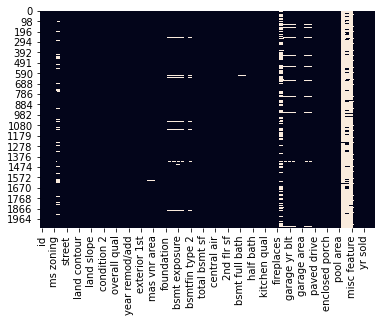

In [108]:
sns.heatmap(train.isnull(), cbar=False)

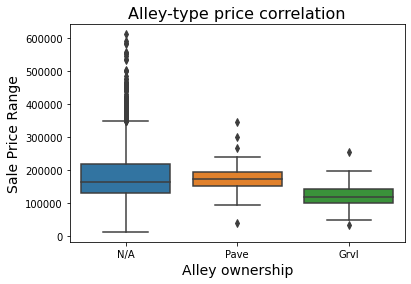

In [170]:
sns.boxplot(x='alley', y = 'saleprice', data = train); 
#exploring if alleys made much a difference in sale price. 
plt.title("Alley-type price correlation", fontsize = 16)
plt.xlabel("Alley ownership", fontsize = 14)
plt.ylabel("Sale Price Range", fontsize = 14);

In [110]:
## We will look at our strongest set, numericals and check their residuals

In [111]:
X = numtrain.drop(columns = ['id', 'saleprice'])
y = numtrain['saleprice']
Xt = testnm.drop(columns = ['id'])
print(X.shape) # Numerical feature set
print(y.shape) # Numerical target
print(Xt.shape) # Numerical Test
## looks good!

(2047, 9)
(2047,)
(878, 9)


In [112]:
# create a new instance for building our visualization for residuals on numerical training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train); 
fullpreds = lr.predict(X) # predicts our target
resids = y - fullpreds # residuals

In [113]:
np.mean(resids) #not looking very good

-372.6592079021997

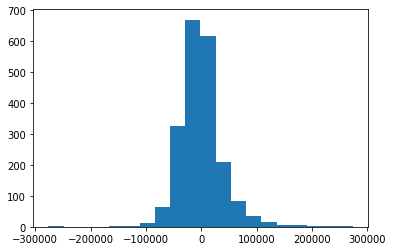

In [114]:
plt.hist(resids, bins=20);

In [115]:
# data appears to have a minor enough skews however,
## the residuals are massive for resids that we are looking to be close to 0

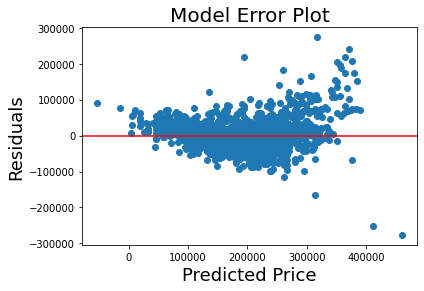

In [166]:
plt.scatter(fullpreds, resids)
plt.axhline(0, color = 'red');
plt.title("Model Error Plot", fontsize = 20)
plt.xlabel("Predicted Price", fontsize = 18)
plt.ylabel("Residuals", fontsize = 18);

In [117]:
# Again, a majority of our resids sit below 0.

In [147]:
features = ['overall qual', 'bsmt full bath', 'bsmt half bath', 'full bath',
       'half bath', 'bedroom abvgr', 'kitchen abvgr', 'totrms abvgrd',
       'garage cars']

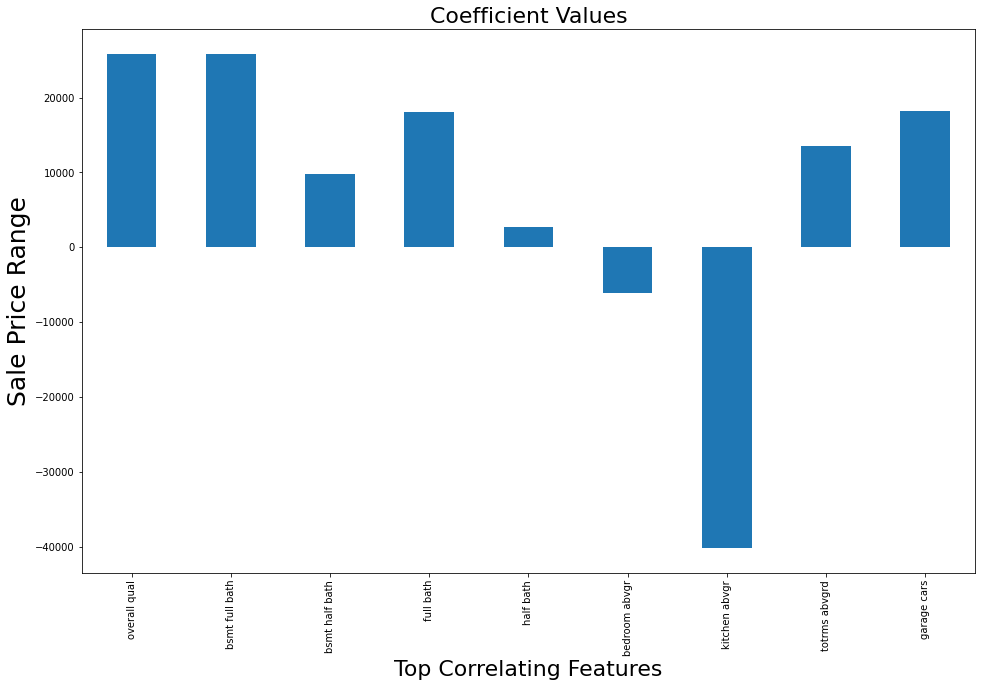

In [171]:
pd.Series(lr.coef_, index=features).plot.bar(figsize=(16, 10))
plt.title("Coefficient Values", fontsize = 22)
plt.xlabel("Top Correlating Features", fontsize = 22)
plt.ylabel("Sale Price Range", fontsize = 25);

In [118]:
numtrain.corr()

,id,overall qual,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,totrms abvgrd,garage cars,saleprice
id,1.000000,-0.062351,-0.032849,0.016101,-0.060286,-0.043305,0.012405,-0.002048,-0.007127,-0.048563,-0.052630
overall qual,-0.062351,1.000000,0.175921,-0.046891,0.515681,0.275060,0.054466,-0.170895,0.382886,0.588518,0.800443
bsmt full bath,-0.032849,0.175921,1.000000,-0.145836,-0.010641,-0.026947,-0.158530,-0.029462,-0.040142,0.174361,0.282662
bsmt half bath,0.016101,-0.046891,-0.145836,1.000000,-0.058451,-0.045990,0.011880,-0.079255,-0.055483,-0.033414,-0.044248
full bath,-0.060286,0.515681,-0.010641,-0.058451,1.000000,0.154014,0.344185,0.166027,0.520805,0.466477,0.539667
half bath,-0.043305,0.275060,-0.026947,-0.045990,0.154014,1.000000,0.232504,-0.040089,0.341140,0.232926,0.282821
bedroom abvgr,0.012405,0.054466,-0.158530,0.011880,0.344185,0.232504,1.000000,0.227267,0.655431,0.084098,0.139876
kitchen abvgr,-0.002048,-0.170895,-0.029462,-0.079255,0.166027,-0.040089,0.227267,1.000000,0.276615,-0.034383,-0.125450
totrms abvgrd,-0.007127,0.382886,-0.040142,-0.055483,0.520805,0.341140,0.655431,0.276615,1.000000,0.367468,0.505864
garage cars,-0.048563,0.588518,0.174361,-0.033414,0.466477,0.232926,0.084098,-0.034383,0.367468,1.000000,0.650239


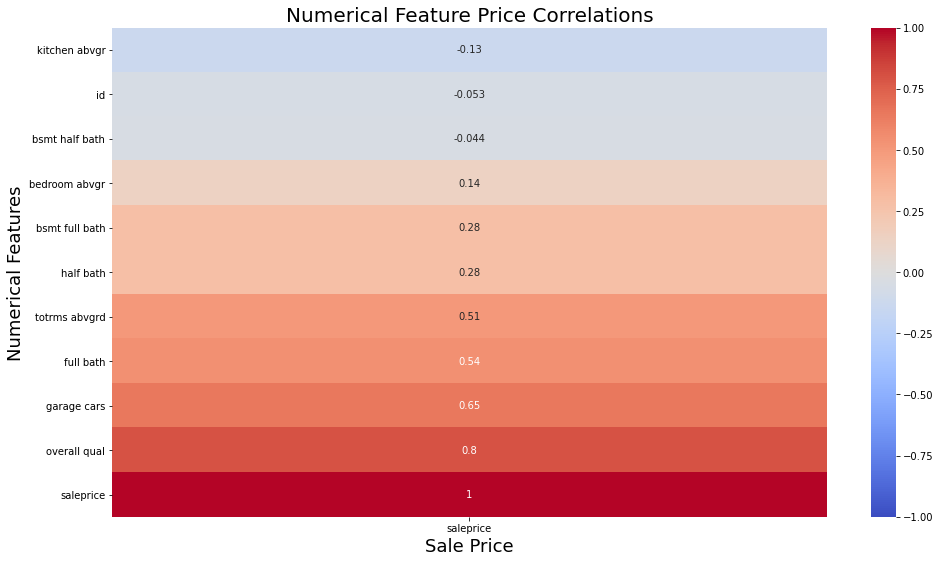

In [164]:
plt.figure(figsize=(16, 9))
sns.heatmap(numtrain.corr()[['saleprice']].sort_values('saleprice'), 
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
plt.title("Numerical Feature Price Correlations", fontsize = 20)
plt.xlabel("Sale Price", fontsize = 18)
plt.ylabel("Numerical Features", fontsize = 18);

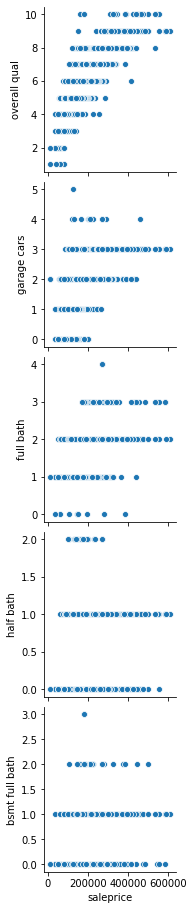

In [161]:
#we'll grab our top 5 correlating features
sns.pairplot(numtrain, x_vars = 'saleprice', y_vars = ['overall qual', 'garage cars', 'full bath', 'half bath', 'bsmt full bath']);

In [121]:
# As expected, we can see that the top 3 categories show a stronger
## tendency and price separation based on scores

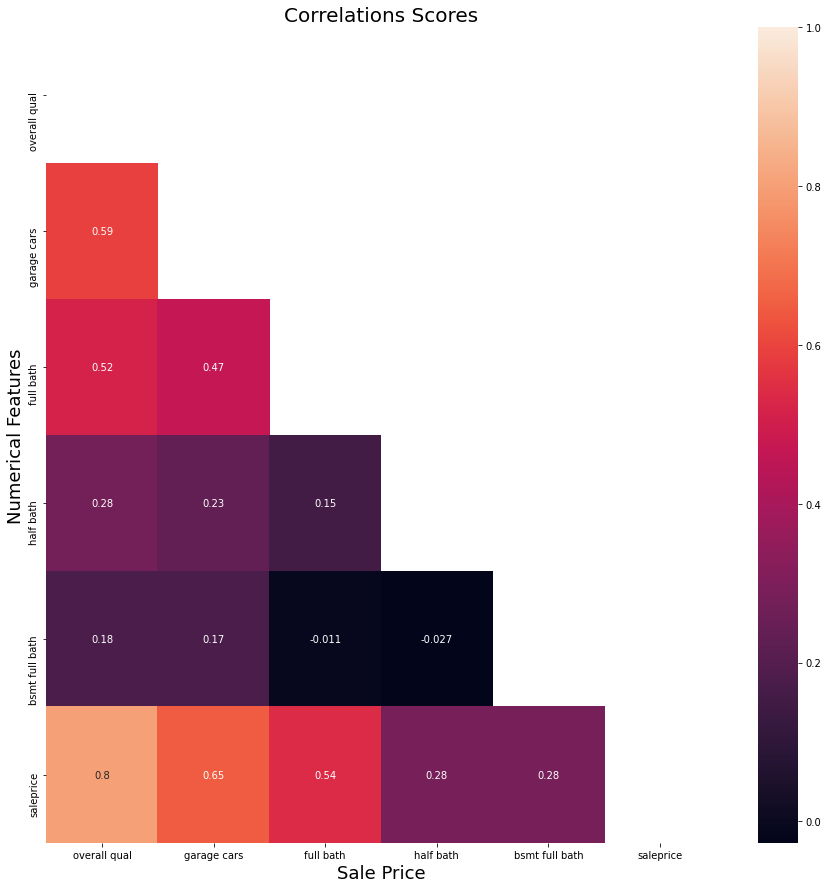

In [163]:
top5 = ['overall qual', 'garage cars', 'full bath', 'half bath', 'bsmt full bath', 'saleprice']
# plot our size
plt.figure(figsize=(15,15))

corr = numtrain[top5].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# set our correlations
sns.heatmap(corr, mask = mask, annot=True)

plt.title("Correlations Scores", fontsize = 20)
plt.xlabel("Sale Price", fontsize = 18)
plt.ylabel("Numerical Features", fontsize = 18);

# External Research

##### Solutions we can take home to ourselves:
- Home projects can have up to a value of 10 times the installation cost on sale. 
- We can look at windows, they are cheap, boost value, and currently in demand. 
 - Windows are within HoA jurisdiction with the correct authorizations. Finding aesthetic, consistent, and popular windows is an affordable option. Window price ranges from $300-$700 per window if using a window isntaller. If we find our own specialist we can cut this down to just the materials which HoA can already purchase at Contractor's bulk price from the locals.
- Dedicated specialty rooms (gyms, theaters, pool room, etc.), while covering a small percentage of properties, tend to double in sales the national median.

<br> -[Source: Features to Boost Home Value](#https://www.realtor.com/news/trends/top-15-home-features-to-boost-your-homes-value-and-sell-it-faster/) 
<br> -[Source: Features Buyers Want](#https://www.kiplinger.com/slideshow/real-estate/T010-S001-home-features-today-s-buyers-want-most/index.html)
<br> -[Source: Remodeling Costs vs Sale](#https://www.remodeling.hw.net/cost-vs-value/2019/west-north-central/)
<br> -[Source: HoA Window Regulations](#https://ringerwindows.com/residential-windows-hoa-programs/)
<br> -[Scource: Typical Home Owner](#https://www.zillow.com/report/2017/homeowners/typical-american-homeowner/)

# Conclusions and Recommendations

Currently our model is better suited for finding correlating features rather than predict price. The features we've worked with have been documented and cleaned so we can continue assessing trends and use external data to align with features we deem valuable. <br><br>

While we can maintain our current HoA regulations, our model does help us find features we can investigate on improving or adding to our own houses, increasing their individual value. <br><br>

If we'd like to pursue tightening down on regulations, windows can fall under architectural replacement with the right authorizations. However, this would be costly to us and the community as a whole. As windows are trendy, we can take advantage of recyclable material trend and take installation costs down by finding a specialist from within our community network.



#### Score Summaries Once more:

#### Categorical Score Summary
- `train R2 score`: 0.6578429575225204
- `test R2 score`: 0.5762651698596276
- `cross val score`: 0.6163932809393643
- `R2 Score (without split)`: 0.6455431466231798
- `RMSE Train/Split score`: 46848.294477176525
- `RMSE on full features`: 47592.55017675726
    
#### Conclusions:
Our training set is definitely overfit, with the cross val and test scores showing .03-.04 difference implies our model has higher variance (test and crossval lower than our training score). 

We will proceed to now test numerical features.

#### Numercal Score Summary
- `train R2 score`: 0.7553817990521428
- `test R2 score`: 0.7636609305004238
- `cross val score`: 0.7464907120547879
- `R2 Score (without split)`: 0.7576575430618783
- `RMSE Train/Split score`: 38611.440491748916
- `RMSE on full features`: 39003.28692496293

#### Conclusions:
Numerical columns definitely had a stronger R2 score, the change in test r2 vs cross-val(cv) implies we may be underfit, but with low variance. It's certainly our better model so far


##### Scaled Score Summary
- `train R2 score`: 0.6723902525839343
- `test R2 score`: 0.7294544670268371
- `cross val score`: 0.634384215358273
- `R2 Score (without split)`: 0.6887855968651643
- `RMSE Train/Split score`: 44683.792650829135
- `RMSE on full features`: 44338.90383859943


#### Conclusions:
Adding our scaled data revelead a high variance with the increase in test R2 score. CV scoring implies there may have been some data imbalance with train/split.
<br><br> Our overal r2 sits at a lower .67 with RMSE rising higher than the numericals.




